In [1]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

from tqdm import tqdm

%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = (15, 6)
rcParams['image.cmap'] = 'viridis'

# [1] (К теоретической задаче 1)


Сгенерируйте 𝑀 = 100 выборок $𝑋_1, ..., 𝑋_{1000}$ из равномерного распределения на отрезке $[0, \theta]$ ( возьмите три произвольных положительных значения $\theta$ ). 

Для каждой выборки $𝑋_1, . . . , 𝑋_𝑛$ для всех 𝑛 <= 1000 посчитайте оценки параметра $\theta$ из теоретической задачи:
- 1) $2\bar{X};$


- 2) $(n+1)X_{(1)}$


- 3) $X_{(1)} + X_{(n)}$


- 4) $\frac{n+1}{n}X_{(n)}$


Посчитайте для всех полученых оценок $\widehat{\theta}$ квадратичную функцию потерь $(\widehat{\theta} - \theta)^2$ и для каждого фиксированного 𝑛 усредните по выборкам.
Для каждого из трех значений $\theta$ постройте графики усредненных функций потерь в зависимости от 𝑛.

In [82]:
def calculations(theta):
    
    M = 100 ## количество выборок;
    N = 1000 ## количество элементов в каждой выборке;
    X = np.zeros((M, N)) ## матрица с исходными выборками;
    X_res = [] ## массив из 4х массив, в каждом из которых средние кв. ошибки по всем выборкам для каждого n;
    
    for i in range(M):
        X[i,:] = np.random.uniform(low=0, high=theta, size=N)
    
    estimators = {}
    estimators[1] = lambda x: [2*np.mean(x[:n]) for n in range(1, len(x)+1)]
    estimators[2] = lambda x: [(n+1)*np.min(x[:n]) for n in range(1, len(x)+1)]
    estimators[3] = lambda x: [np.min(x[:n])+np.max(x[:n]) for n in range(1, len(x)+1)]
    estimators[4] = lambda x: [((n+1)/n)*np.max(x[:n]) for n in range(1, len(x)+1)]
    sq_err = lambda x: (x-theta)**2 ## для строчки, подающейся на вход,
                                    ## считаем квадратичную ошибочку для каждого ее члена;
    for i in range(1,5):
        tmp = np.apply_along_axis(estimators[i], axis=1, arr=X) # это оценка;
        err = np.apply_along_axis(sq_err, axis=1, arr=tmp) # это ошибка;
        X_res.append(np.mean(err, axis=0)) # средняя по всем выборкам ошибка для каждого n;
        
    #################################################################################
    ## Построение графиков ###
    #################################################################################
    
    labels = ['$2\overline{X}$', '$(n+1)X_{(1)}$', '$X_{(1)} + X_{(n)}$', r'$\frac{n+1}{n}X_{(n)}$']
    for i, (l,c) in enumerate(zip(labels, ['r', 'b', 'g', 'y'])):
        plt.scatter(range(1, N+1), X_res[i], label = l, c=c, alpha=0.3)
        
    plt.title(r"$\theta={}$".format(theta))
    plt.xlabel("n")
    plt.ylabel(r"$(\widehat{\theta} - \theta)^2$")
    plt.semilogy()
    plt.legend(fontsize=14)
    plt.ylim((10**(-8), 11))
    plt.show()

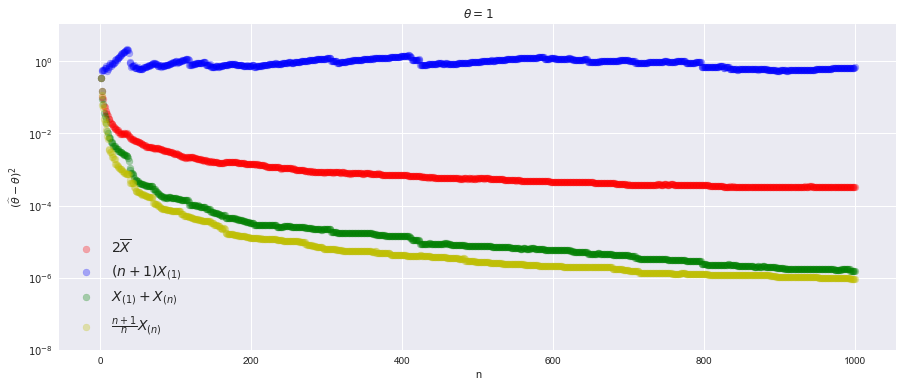

In [83]:
calculations(1)

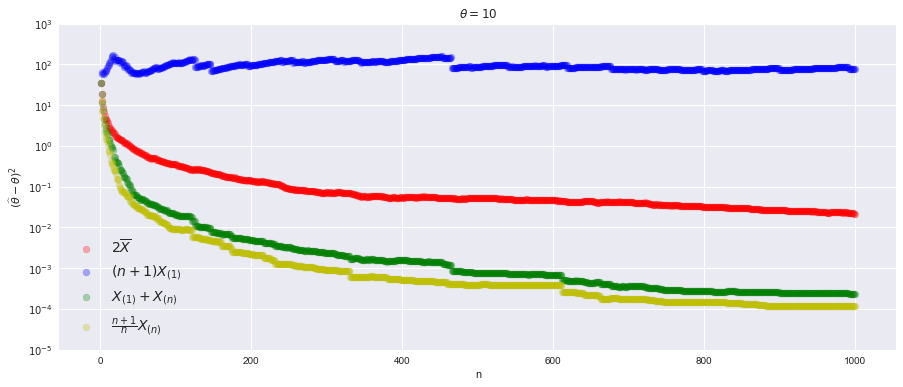

In [81]:
calculations(10)

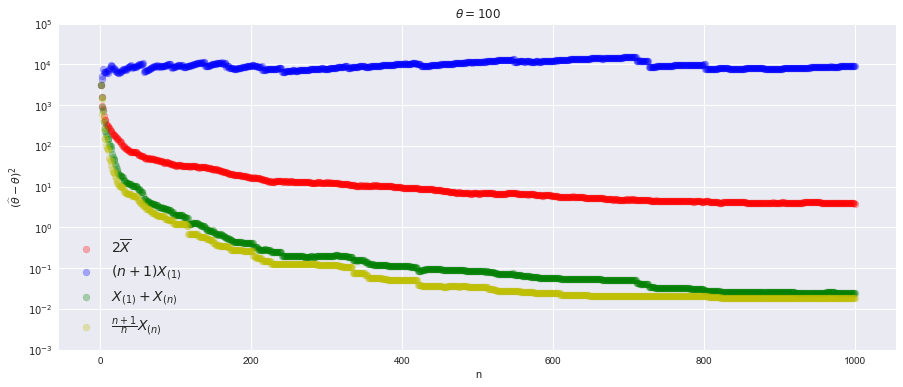

In [79]:
calculations(100)

## Вывод:
Хуже всего сходится оценка [2], лучше всего -- оценка [4];

Независимо от размеров выборки средняя квадратичная ошибка увеличивается с увеличением $\theta$

# [2] (К теоретическим задачам 3, 4, 5)

В задаче требуется экспериментально проверить утверждение, что для любой несмещенной оценки $\theta(𝑋)$
параметра $\theta$ выполнено неравенство Рао-Крамера:
$$ D_{\theta} \widehat{\theta}(X) \geq \frac{1}{I_X (\theta)} $$


Cгенерируйте выборку $𝑋_1, ..., 𝑋_𝑁$ , 𝑁 = 1000, из распределений в теоретических задачах (распределение Бернулли, экспоненциальное распределение и нормальное распределение с неизвестным математическим ожиданием).

В случае биномиального распределения 𝑚 = 50, в случае нормального распределения с неизвестным математическим ожиданием $\sigma^2 = 2.1$. Второй параметр (единственный в случае экспоненциального распределения) выберите случайно из распределения, предложенного в файле (Beta(1.5, 2)).

Для всех 𝑛<=𝑁 посчитайте значение эффективной оценки и бутстрепную оценку дисперсии для эффективной оценки (параметрический бутстреп, количество бутстрепных выборок равно 500). 

Сделайте то же самое с другой несмещенной оценкой — 
* в задаче 3 возьмите $𝑋_1/𝑚$,
* в задаче 4 возьмите $\frac{(𝑛−1)}{\bar{X}}$, 
* в задаче 5 возьмите выборочную медиану.

Постройте графики зависимости бутстрепных оценок дисперсий от размера выборки $n$. Для каждой бутстрепной оценки постройте на том же графике  кривую зависимости $\frac{1}{I_X (\theta)}$ от $n$